In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [10]:

stocksymbols = ['TATAMOTORS.NS']
start_date = date(2017, 8, 4)
end_date = date.today()

def getMyPortfolio(stocks=stocksymbols, start=start_date, end=end_date):
    data = yf.download(stocks, start=start, end=end)
    return data

data = getMyPortfolio(stocksymbols)
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-08-04  435.100006  438.750000  433.450012  435.600006  434.246582   
2017-08-07  438.600006  439.799988  425.299988  430.000000  428.663971   
2017-08-08  432.000000  435.500000  426.000000  430.000000  428.663971   
2017-08-09  428.799988  429.899994  415.000000  416.049988  414.757324   
2017-08-10  401.000000  403.600006  375.250000  380.200012  379.018738   
...                ...         ...         ...         ...         ...   
2023-10-20  666.650024  676.400024  660.500000  663.200012  663.200012   
2023-10-23  663.650024  667.250000  645.000000  647.349976  647.349976   
2023-10-25  650.000000  651.900024  636.049988  637.849976  637.849976   
2023-10-26  635.000000  635.650024  624.150024  626.549988  626.549988   
2023-10-27  630.000000  643.950012  628.450

In [11]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [12]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1077273166.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA 30'][i] > data['SMA 100'][i]:
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1077273166.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA 30'][i] < data['SMA 100'][i]:
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1077273166.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-20,666.650024,676.400024,660.500000,663.200012,663.200012,11759568,633.219999,608.979501,NaN,NaN
2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004,634.301664,610.265001,NaN,NaN
2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559,634.654997,611.380500,NaN,NaN


In [13]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
SMA 30                 29
SMA 100                99
Buy_Signal_price     1533
Sell_Signal_price    1534
dtype: int64

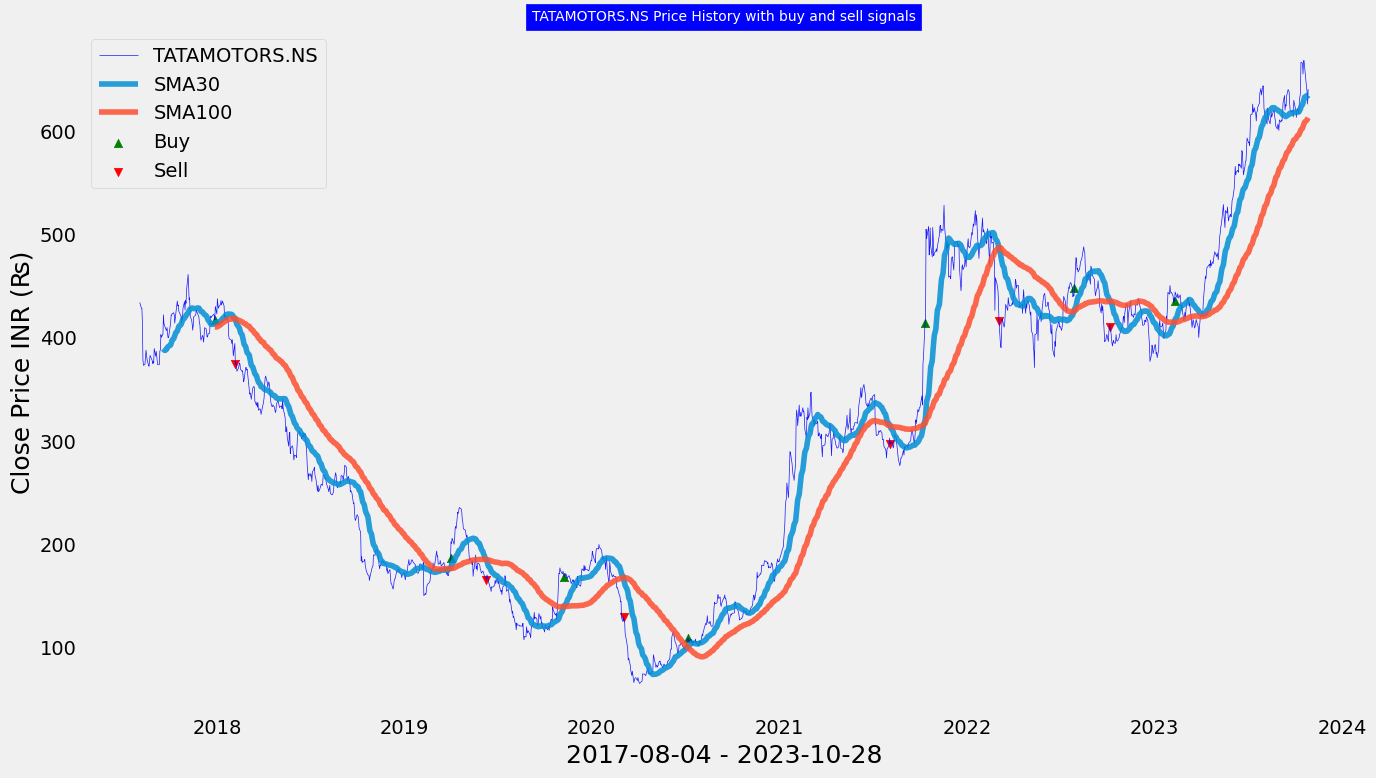

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [15]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04,NaN,NaN,NaN
2017-08-07,NaN,NaN,NaN
2017-08-08,NaN,NaN,NaN
2017-08-09,NaN,NaN,NaN
2017-08-10,NaN,NaN,NaN
...,...,...,...
2023-10-20,12.055986,3.959885,8.096101
2023-10-23,10.898509,2.241926,8.656583
2023-10-25,9.109619,0.362429,8.747190


In [16]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,666.650024,676.400024,660.500000,663.200012,663.200012,11759568,633.219999,608.979501,NaN,NaN,12.055986,3.959885,8.096101
2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004,634.301664,610.265001,NaN,NaN,10.898509,2.241926,8.656583
2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559,634.654997,611.380500,NaN,NaN,9.109619,0.362429,8.747190


In [17]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell


In [18]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy


C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\2976003860.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\2976003860.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\2976003860.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [19]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data


C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\4061956498.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,666.650024,676.400024,660.500000,663.200012,663.200012,11759568,633.219999,608.979501,NaN,NaN,12.055986,3.959885,8.096101,NaN,NaN,False
2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004,634.301664,610.265001,NaN,NaN,10.898509,2.241926,8.656583,NaN,NaN,False
2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559,634.654997,611.380500,NaN,NaN,9.109619,0.362429,8.747190,NaN,NaN,False


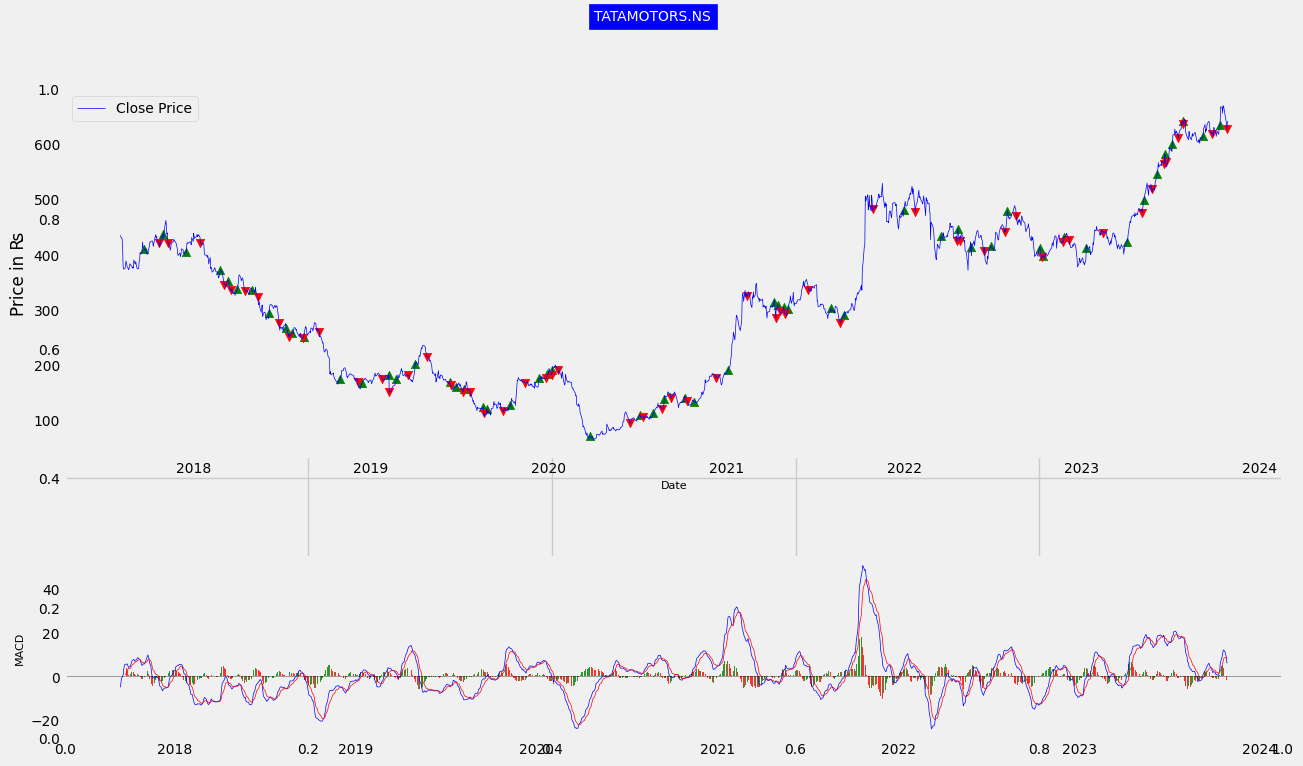

In [20]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()


In [21]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [22]:
#storing the function
data = bb_strategy(data)
data

C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1025176429.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1025176429.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
C:\Users\mgowt\AppData\Local\Temp\ipykernel_31708\1025176429.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,666.650024,676.400024,660.500000,663.200012,663.200012,11759568,633.219999,608.979501,NaN,NaN,...,NaN,NaN,False,594.702333,635.392499,676.082664,12.807884,0.841698,NaN,NaN
2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004,634.301664,610.265001,NaN,NaN,...,NaN,NaN,False,596.334599,636.737497,677.140395,12.690598,0.631333,NaN,NaN
2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559,634.654997,611.380500,NaN,NaN,...,NaN,NaN,False,598.148765,637.694995,677.241225,12.402867,0.501959,NaN,NaN


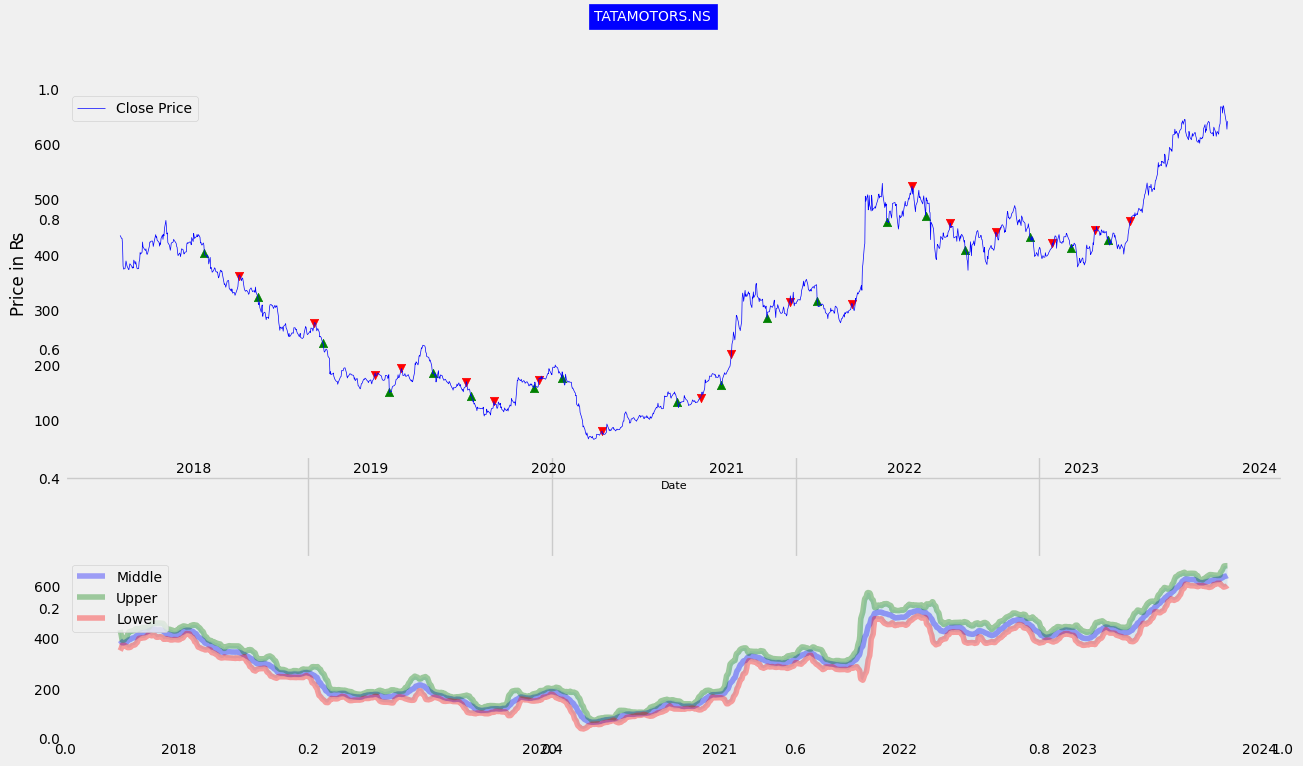

In [23]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()